<a href="https://colab.research.google.com/github/Songlahaha/tensor/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds    # 導入tensorflow官方的資料集

In [45]:
dataset, dataset_info = tfds.load("malaria", with_info=True, as_supervised=True, shuffle_files=True, split=["train"])    # 載入資料集

In [ ]:
dataset

{Split('train'): <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path=PosixGPath('/tmp/tmpc5psnsl4tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},

In [ ]:
for data in dataset["train"].take(1):
  print(data)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


資料集切割

In [46]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  dataset_size = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO*dataset_size))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*dataset_size))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*dataset_size))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*dataset_size))
  return train_dataset, val_dataset, test_dataset

In [47]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

Dataset 視圖化

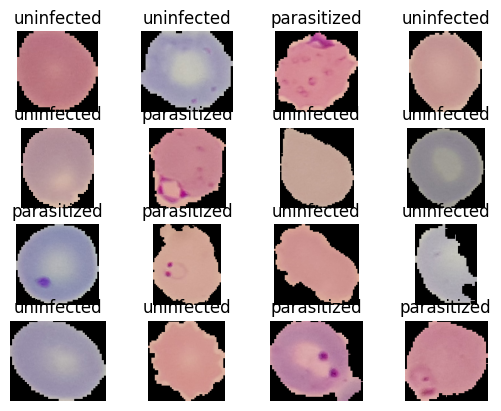

In [6]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.title(dataset_info.features["label"].int2str(label))
  plt.axis("off")
  plt.imshow(image)

使Map進行預處理
tf.image.resize(image, (IM_SIZE, IM_SIZE)) 將圖像調整為指定的大小 (IM_SIZE, IM_SIZE)。這將確保所有的圖像都有相同的大小，以符合模型的輸入要求。

接著，/255. 對調整大小後的圖像進行了歸一化處理。除以 255 的目的是將像素值縮放到 0 到 1 的範圍內，以確保圖像的像素值符合模型的期望輸入範圍。

In [48]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255., label

In [49]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)


tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


打亂資料, batch大小設定

In [50]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [51]:
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

不錯的CNN概念網站
https://poloclub.github.io/cnn-explainer/

建立Model

In [75]:
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    # 建立filter , 第一層
    Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 建立filter , 第二層
    Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 攤平資料, 並建立輸出
    Flatten(),

    Dense(1000, activation='relu'),
    BatchNormalization(),

    Dense(100, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid'),

])

In [77]:
from keras.optimizers import Adam
from keras.engine.training import optimizer
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
from tensorflow.keras.losses import BinaryCrossentropy
model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics= ['acc']
)

In [54]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1)

Epoch 1/20
689/689 [==============================] - 82s 71ms/step - loss: 0.3666 - acc: 0.8367 - val_loss: 0.3638 - val_acc: 0.9009
Epoch 2/20
689/689 [==============================] - 53s 77ms/step - loss: 0.2097 - acc: 0.9287 - val_loss: 0.6756 - val_acc: 0.8512
Epoch 3/20
689/689 [==============================] - 49s 70ms/step - loss: 0.2022 - acc: 0.9326 - val_loss: 0.1870 - val_acc: 0.9485
Epoch 4/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1832 - acc: 0.9365 - val_loss: 0.2035 - val_acc: 0.9412
Epoch 5/20
689/689 [==============================] - 49s 71ms/step - loss: 0.1650 - acc: 0.9441 - val_loss: 0.1814 - val_acc: 0.9405
Epoch 6/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1566 - acc: 0.9470 - val_loss: 0.4048 - val_acc: 0.8011
Epoch 7/20
689/689 [==============================] - 48s 70ms/step - loss: 0.1710 - acc: 0.9404 - val_loss: 0.2739 - val_acc: 0.9452
Epoch 8/20
689/689 [==============================] - 52s 75ms

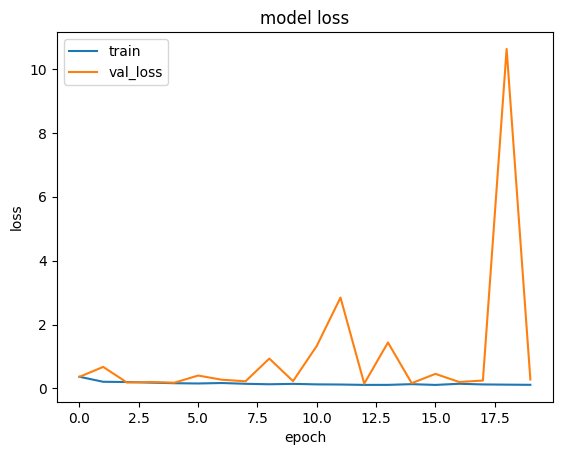

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train",'val_loss'])
plt.show()

In [78]:
model.evaluate(test_dataset)

87/87 [==============================] - 16s 49ms/step - loss: 0.6945 - acc: 0.4904


[0.6945397257804871, 0.49038809537887573]

當x大於0.5時就代表被感染的機率大 , 所以顯示P
當小於0.5時就代表被感染的機率小 , 就顯示U
因為sigmoid輸出後是兩個結果相加等於1 , 也就是說可以當成機率來觀察
1就是100%

In [56]:
def parasite_or_not(x):
  if (x<0.5):
    return str("P")
  else:
    return str("U")

In [57]:
parasite_or_not(model.predict(test_dataset.take(1))[0])

1/1 [==============================] - 14s 14s/step


'P'

1/1 [==============================] - 12s 12s/step


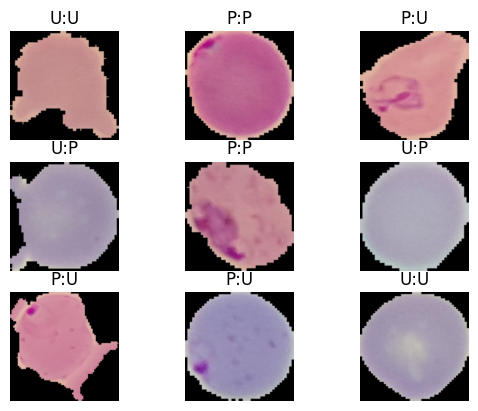

In [59]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(test_dataset.take(1))[0][0])))
  plt.axis("off")

儲存Model的訓練結果

In [61]:
model.save("SaveModel")

加載Model

In [64]:
new_model = tf.keras.models.load_model("SaveModel")
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

用載入的New Model進行預測

In [65]:
parasite_or_not(new_model.predict(test_dataset.take(1))[0])

1/1 [==============================] - 13s 13s/step


'P'

In [69]:
model.save("SaveModel_hdf5.hdf5")

In [70]:
new_model_hdf5 = tf.keras.models.load_model("SaveModel")
new_model_hdf5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

In [72]:
parasite_or_not(new_model_hdf5.predict(test_dataset.take(1))[0])

1/1 [==============================] - 12s 12s/step


'U'

只保存權重

In [74]:
model.save_weights("weight/model_weight")

In [ ]:
# 測試model前後對比

In [79]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    # 建立filter , 第一層
    Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 建立filter , 第二層
    Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 攤平資料, 並建立輸出
    Flatten(),

    Dense(1000, activation='relu'),
    BatchNormalization(),

    Dense(100, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics= ['acc']
)

In [80]:
model.evaluate(test_dataset)

87/87 [==============================] - 18s 38ms/step - loss: 0.6941 - acc: 0.4770


[0.6941472887992859, 0.4769677221775055]

In [81]:
model_weight = model.load_weights("./weight/model_weight")      # 載入權重

In [82]:
model.evaluate(test_dataset)

87/87 [==============================] - 17s 49ms/step - loss: 0.2908 - acc: 0.9162


[0.29080498218536377, 0.9162132740020752]

儲存到google drive

In [83]:
from google.colab import drive

In [87]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [89]:
!cp -r /content/SaveModel/ /content/drive/MyDrive/路徑/

In [90]:
# 從之前儲存的路徑複製回到colab裡面

In [93]:
!cp -r /content/drive/MyDrive/路徑/ /content/